### 필요한 라이브러리 선언

In [170]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from user_agent import generate_user_agent
import pandas as pd

### url을 자동으로 user-agent를 설정하여 요청하고 soup을 반환하는 함수

In [171]:
def url_to_soup(url):
    req = Request(url, headers={'User-Agent': generate_user_agent()})
    page = urlopen(req)
    soup = BeautifulSoup(page, "html.parser")
    return soup


함수 테스트

In [172]:
url = "https://www.chicagomag.com/chicago-magazine/august-2024/chicagos-50-best-restaurants-ranked/"
soup = url_to_soup(url)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <link href="https://gmpg.org/xfn/11" rel="profile"/>
   <script src="https://cmp.osano.com/16A1AnRt2Fn8i1unj/f15ebf08-7008-40fe-9af3-db96dc3e8266/osano.js">
   </script>
   <title>
    Chicago’s 50 Best Restaurants, Ranked – Chicago Magazine
   </title>
   <meta content="max-image-preview:large" name="robots"/>
   <style>
    img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }
   </style>
   <!-- Google Tag Manager for WordPress by gtm4wp.com -->
   <script data-cfasync="false" data-pagespeed-no-defer="">
    var gtm4wp_datalayer_name = "dataLayer";
	var dataLayer = dataLayer || [];
   </script>
   <!-- End Google Tag Manager for WordPress by gtm4wp.com -->
   <meta content="width=device-width, initial-scale=1" name="viewport"/>
   <link href="//cdnjs.cloudflare.com" rel="dns-prefetch">
    <link href="https://www.chicagomag

### h2 태크 확인

In [173]:
soup.find(class_="br50").find_all("h2")

[<h2><span>1</span>Monteverde</h2>,
 <h2><span>2</span>Oriole</h2>,
 <h2><span>3</span>Galit</h2>,
 <h2><span>4</span>Avec</h2>,
 <h2><span>5</span>Kasama</h2>,
 <h2><span>6</span>Virtue</h2>,
 <h2><span>7</span>HaiSous Vietnamese Kitchen</h2>,
 <h2><span>8</span>Shaw’s Crab House</h2>,
 <h2><span>9</span>Dear Margaret</h2>,
 <h2><span>10</span>Boka</h2>,
 <h2><span>11</span>Kyoten/Kyoten Next Door</h2>,
 <h2><span>12</span>Hermosa Restaurant</h2>,
 <h2><span>13</span>Warlord</h2>,
 <h2><span>14</span>Elske</h2>,
 <h2><span>15</span>John’s Food &amp; Wine</h2>,
 <h2><span>16</span>El Che Steakhouse &amp; Bar</h2>,
 <h2><span>17</span>Ever</h2>,
 <h2><span>18</span>Obélix</h2>,
 <h2><span>19</span>Sepia</h2>,
 <h2><span>20</span>Lula Cafe</h2>,
 <h2><span>21</span>Bungalow by Middle Brow</h2>,
 <h2><span>22</span>Atelier</h2>,
 <h2><span>23</span>La Chaparrita Grocery</h2>,
 <h2><span>24</span>Perilla</h2>,
 <h2><span>25</span>Superkhana International</h2>,
 <h2><span>26</span>Birrieria

### 아이템을 가져와 형식 확인하기

In [174]:
for idx, item in enumerate(soup.find(class_="br50").find_all("h2")):
    print(item.get_text())

1Monteverde
2Oriole
3Galit
4Avec
5Kasama
6Virtue
7HaiSous Vietnamese Kitchen
8Shaw’s Crab House
9Dear Margaret
10Boka
11Kyoten/Kyoten Next Door
12Hermosa Restaurant
13Warlord
14Elske
15John’s Food & Wine
16El Che Steakhouse & Bar
17Ever
18Obélix
19Sepia
20Lula Cafe
21Bungalow by Middle Brow
22Atelier
23La Chaparrita Grocery
24Perilla
25Superkhana International
26Birrieria Zaragoza
27Lem’s Bar-B-Q
28Indienne
29Demera
30The Loyalist
31JT’s Genuine Sandwich Shop
32The Duck Inn
33Mitsuwa Marketplace Food Court
34Lilac Tiger
35Bavette’s Bar & Boeuf
36Ocean Grill and Bar
37Daisies
38Roux
39S.K.Y.
40Schwa
41Boeufhaus
42New Village Gastro Pub
43Bayan Ko
44Noon-O-Kabab
45Spacca Napoli
46Shanghai Terrace
47Daisy’s Po-Boy and Tavern
48Dolo Restaurant and Bar
49Redhot Ranch
50Immm Rice & Beyond


Rank를 가져오는 함수

In [175]:
def getPriceRank(soup):
    temp = soup.find(class_="light")
    if temp is None:
        return 5
    else:
        minusVal = len(temp.get_text())
        return 5-minusVal

Address와 Website를 가져오는 함수

In [102]:
import re
def getAddressAndWebsite(soup):
    text = soup.find("div", class_="br50-footer")
    webLink = text.a["href"]
    text = text.get_text()

    addStart, addEnd = re.search("Address:\s", text).span()
    webStart, webEnd = re.search("Website:\s", text).span()
    return text[addEnd:webStart].split("\n")[0], webLink

### 사이트에서 각종 데이터 수집하여 데이터프레임 생성

In [176]:
prefix = "https://www.chicagomag.com"
price_rank = []
rank = []
name = []
address = []
link = []
sub_name = []
for idx, item in enumerate(soup.find(class_="br50").find_all("h2")):
    text = item.get_text()
    start, end = re.search("[0-9]+", text).span()
    rank.append(text[start:end])
    name.append(text[end:])
    food_url = prefix + item.parent["href"]
    food_soup = url_to_soup(food_url)
    price_rank.append(getPriceRank(food_soup))
    sub_name.append(food_soup.find("div", class_="art-deck").get_text())
    address.append(getAddressAndWebsite(food_soup)[0])
    link.append(getAddressAndWebsite(food_soup)[1])
df = pd.DataFrame({"rank": rank, "name": name, "sub_name": sub_name, "address": address, "link": link, "price_rank": price_rank})
df

,rank,name,sub_name,address,link,price_rank
0,1,Monteverde,West Loop,1020 W. Madison St.,https://monteverdechicago.com,3
1,2,Oriole,West Loop,661 W. Walnut St.,https://www.oriolechicago.com,5
2,3,Galit,Lincoln Park,2429 N. Lincoln Ave.,https://www.galitrestaurant.com,4
3,4,Avec,West Loop | River North,615 W. Randolph St. | 141 W. Erie St.,https://www.avecrestaurant.com,3
4,5,Kasama,East Ukrainian Village,1001 N. Winchester Ave.,https://www.kasamachicago.com,5
5,6,Virtue,Hyde Park,1462 E. 53rd St.,https://www.virtuerestaurant.com,3
6,7,HaiSous Vietnamese Kitchen,Pilsen,1800 S. Carpenter St.,https://www.haisous.com,3
7,8,Shaw’s Crab House,River North,21 E. Hubbard St.,https://www.shawscrabhouse.com/chicago-illinois,3
8,9,Dear Margaret,Lake View,2965 N. Lincoln Ave,https://www.dearmargaretchi.com,3
9,10,Boka,Lincoln Park,1729 N. Halsted St.,https://www.bokachicago.com,5


### 셀레니움을 사용하여 평점 가져오는 함수. Query에 검색어를 넣으면 평점을 가져옴

In [160]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import re
import random

def search_rank(query):
    # Google Maps 검색
    driver = webdriver.Chrome()
    url = f"https://www.google.com/maps/search/{query.replace(' ', '+')}"
    driver.get(url)
    time.sleep(random.uniform(1.0, 1.5))
    try:
        finded = driver.find_element(By.CSS_SELECTOR, ".F7nice")
        rating_text = finded.text
    except:
        try:
            # F7nice를 찾지 못한 경우 MW4etd 클래스를 찾음(최상위 결과)
            finded = driver.find_element(By.CSS_SELECTOR, ".MW4etd")
            rating_text = finded.text
        except:
            # 두 클래스 모두 찾지 못한 경우
            rating_text = None
    
    rating = re.search(r'(\d+\.\d+)', rating_text) if rating_text is not None else None
    driver.quit()
    return rating.group(1)



### sub_name 사이에 | 있는 경우 검색이 안되는 경우가 있어 예외 처리.
| 뒤의 지역의 경우 폐업한 경우가 있었음

In [161]:
full_name = []
rating = []
for idx in range(len(df.index)):
    full_name.append(df["name"][idx] + " " + df["sub_name"][idx].split(" | ")[0])
for each in full_name:
    rating.append(search_rank(each))


### None 체크

In [166]:
if None in rating:
    print("Have None")
else :
    print("Don't have None")

Don't have None


### 데이터 프레임에 구글에서 가져온 평점 추가

In [177]:
df["rating"] = rating
df

,rank,name,sub_name,address,link,price_rank,rating
0,1,Monteverde,West Loop,1020 W. Madison St.,https://monteverdechicago.com,3,4.7
1,2,Oriole,West Loop,661 W. Walnut St.,https://www.oriolechicago.com,5,4.8
2,3,Galit,Lincoln Park,2429 N. Lincoln Ave.,https://www.galitrestaurant.com,4,4.5
3,4,Avec,West Loop | River North,615 W. Randolph St. | 141 W. Erie St.,https://www.avecrestaurant.com,3,4.6
4,5,Kasama,East Ukrainian Village,1001 N. Winchester Ave.,https://www.kasamachicago.com,5,4.5
5,6,Virtue,Hyde Park,1462 E. 53rd St.,https://www.virtuerestaurant.com,3,4.6
6,7,HaiSous Vietnamese Kitchen,Pilsen,1800 S. Carpenter St.,https://www.haisous.com,3,4.5
7,8,Shaw’s Crab House,River North,21 E. Hubbard St.,https://www.shawscrabhouse.com/chicago-illinois,3,4.6
8,9,Dear Margaret,Lake View,2965 N. Lincoln Ave,https://www.dearmargaretchi.com,3,4.8
9,10,Boka,Lincoln Park,1729 N. Halsted St.,https://www.bokachicago.com,5,4.7


### 구글 평점 순으로 정렬

In [181]:
df.sort_values(by="rating", ascending=False)

,rank,name,sub_name,address,link,price_rank,rating
30,31,JT’s Genuine Sandwich Shop,Irving Park,3970 N. Elston Ave.,https://jtsgenuine.com,1,4.8
8,9,Dear Margaret,Lake View,2965 N. Lincoln Ave,https://www.dearmargaretchi.com,3,4.8
1,2,Oriole,West Loop,661 W. Walnut St.,https://www.oriolechicago.com,5,4.8
16,17,Ever,West Loop,1340 W. Fulton St.,https://www.ever-restaurant.com,5,4.8
34,35,Bavette’s Bar & Boeuf,River North,218 W. Kinzie St.,https://bavettessteakhouse.com,5,4.8
0,1,Monteverde,West Loop,1020 W. Madison St.,https://monteverdechicago.com,3,4.7
31,32,The Duck Inn,Bridgeport,2701 S. Eleanor St.,https://theduckinnchicago.com,3,4.7
19,20,Lula Cafe,Logan Square,2537 N. Kedzie Blvd.,https://www.lulacafe.com,3,4.7
44,45,Spacca Napoli,Ravenswood,1769 W. Sunnyside Ave.,https://www.spaccanapolipizzeria.com,2,4.7
41,42,New Village Gastro Pub,Northbrook,3566 Milwaukee Ave.,https://www.newvillagepub.com,2,4.7


### 정렬된 인덱스만 가져오기

In [201]:
print(df.sort_values(by="rating", ascending=False).index)

Index([30,  8,  1, 16, 34,  0, 31, 19, 44, 41, 40,  9, 11, 32, 28, 38, 37, 39,
       42, 48, 27, 49, 14,  5,  3, 18, 13,  7, 25,  6,  4, 33, 17, 15, 43, 45,
        2, 24, 10, 36, 29, 20, 23, 35, 47, 22, 12, 46, 26, 21],
      dtype='int64')


### 원래 순서와 비교하여 구글 평점과 랭킹의 연관성 확인

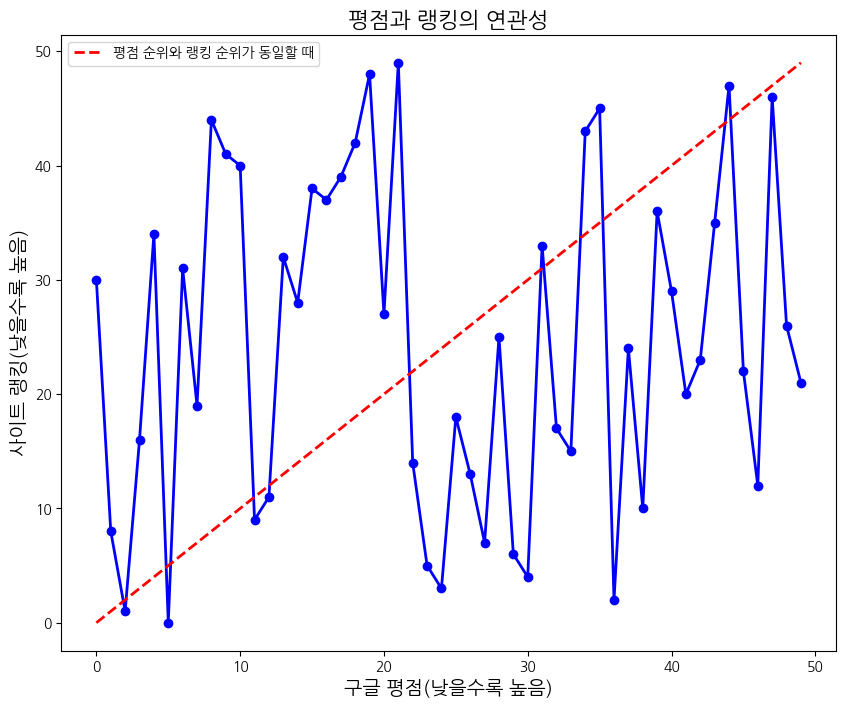

In [199]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import koreanize_matplotlib

rating_sorted_idx = df.sort_values(by="rating", ascending=False).index
original_idx = np.arange(50)

plt.figure(figsize=(10, 8))
plt.plot(original_idx, rating_sorted_idx, '-o', linewidth=2, markersize=6, color='blue')
plt.plot(original_idx, original_idx, 'r--', linewidth=2, label='평점 순위와 랭킹 순위가 동일할 때')

plt.title('평점과 랭킹의 연관성', fontsize=16)
plt.xlabel('구글 평점(낮을수록 높음)', fontsize=14)
plt.ylabel('사이트 랭킹(낮을수록 높음)', fontsize=14)
plt.legend()


## 따라서 구글 평점과 해당 사이트의 랭킹은 상관관계가 없다